###### NAME: JANMEJAY MOHANTY <br> COURSE: CS 583 A <br> COURSE NAME: DEEP LEARNING <br> CWID: 20009315 <br> EMAIL: JMOHANTY@STEVENS.EDU <br> PROGRAM: THREE-LAYER FEEDFORWARD NETWORK AND L2 REGULARIZATION WITH AND WITHOUT DROPOUT

In [1]:
# Loading necessary libraries

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import livelossplot

In [2]:
# Defined function for displaying current states of data

def Summarize_Data(X_train, y_train, X_test, y_test):
    print("____________Current Data States_____________")
    print("Train images shape: {}".format(X_train.shape))
    print("Train labels shape: {}".format(y_train.shape))
    print("Test images shape: {}".format(X_test.shape))
    print("Test labels shape: {}".format(y_test.shape))
    print("Train labels: {}".format(y_train))
    print("Test labels: {}".format(y_test))
    print("____________________________________________")

In [3]:
# Loading the MNIST data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Checking the current state of the data

Summarize_Data(X_train, y_train, X_test, y_test)

____________Current Data States_____________
Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Train labels: [5 0 4 ... 5 6 8]
Test labels: [7 2 1 ... 4 5 6]
____________________________________________


In [4]:
# Reshaping the data

X_train = X_train.reshape((X_train.shape[0], 28 * 28))      #X_train.reshape((X_train.shape[0], n_rows = 28 * n_cols = 28)) 
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28))         #X_test.reshape((X_train.shape[0], n_rows = 28 * n_cols = 28)) 
X_test = X_test.astype('float32') / 255

# Convert to categorically encode labels

y_train = to_categorical(y_train, 10)                       #to_categorial(y_train, n_classes = 10)
y_test = to_categorical(y_test, 10)

In [5]:
# Again checking the current state of the data

Summarize_Data(X_train, y_train, X_test, y_test)

____________Current Data States_____________
Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)
Train labels: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
____________________________________________


• **Build a three-layer feedforward network**: $x \xrightarrow{} h^1 \xrightarrow{} h^2 \xrightarrow{} p(y|h^2)$

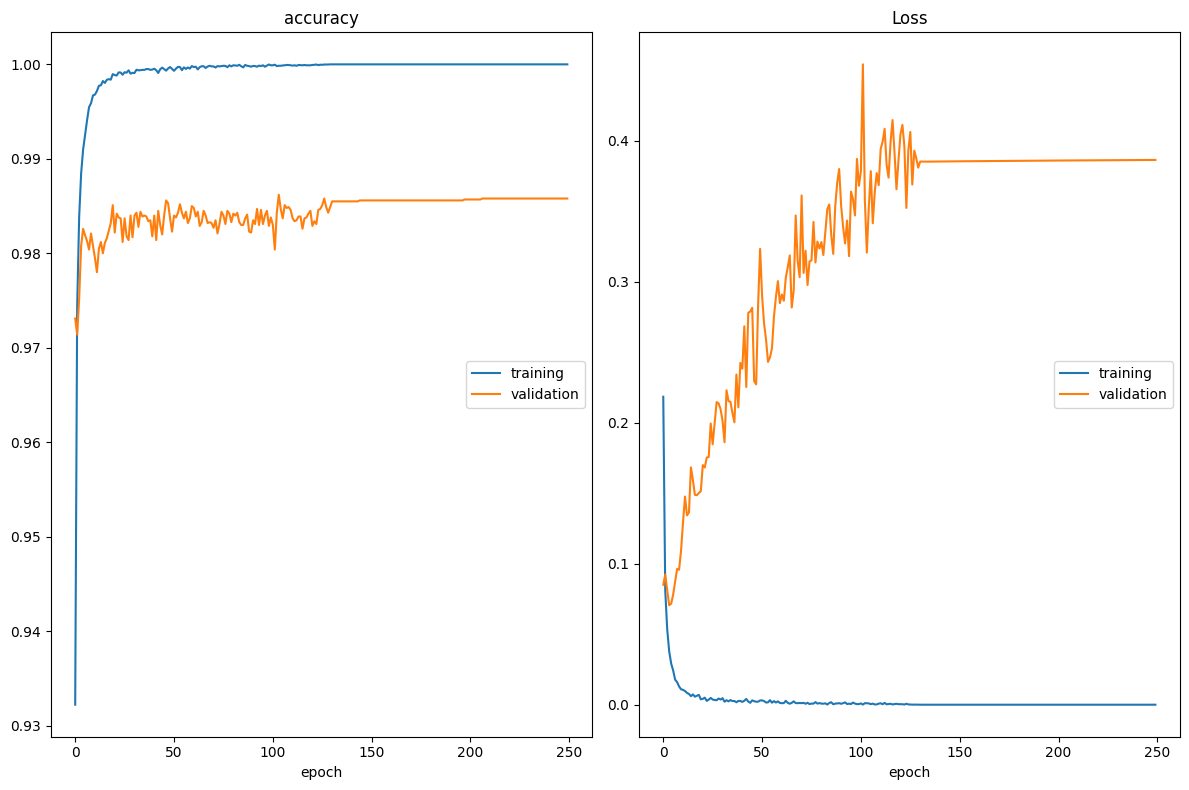

accuracy
	training         	 (min:    0.932, max:    1.000, cur:    1.000)
	validation       	 (min:    0.971, max:    0.986, cur:    0.986)
Loss
	training         	 (min:    0.000, max:    0.218, cur:    0.000)
	validation       	 (min:    0.071, max:    0.454, cur:    0.386)
469/469 [==============================] - 5s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3865 - val_accuracy: 0.9858
Test Loss Score: 0.38646697998046875
Test Accuracy Score: 0.98580002784729


In [6]:
# Building a three-layer feedforward neural network

model1 = Sequential()
model1.add(Dense(500, activation='relu', input_shape=(28 * 28,)))   # Input_shape = (n_rows,n_cols)
model1.add(Dense(500, activation='relu'))
model1.add(Dense(10, activation='softmax'))

# Compiling model1

model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Live training loss plot

PlotLosses1 = livelossplot.PlotLossesKeras()                       

# Training model1

model1.fit(X_train, y_train, batch_size = 128, epochs = 250, callbacks=[PlotLosses1], verbose=1, validation_data=(X_test, y_test))

score = model1.evaluate(X_test, y_test, verbose=0)

# Display both loss and accuracy

print("Test Loss Score:", score[0])
print("Test Accuracy Score:", score[1])

In [7]:
# Displaying three-layer feedforward neural network model1 summary

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


**• Build a three-layer feedforward network with l2 regularization and dropout**

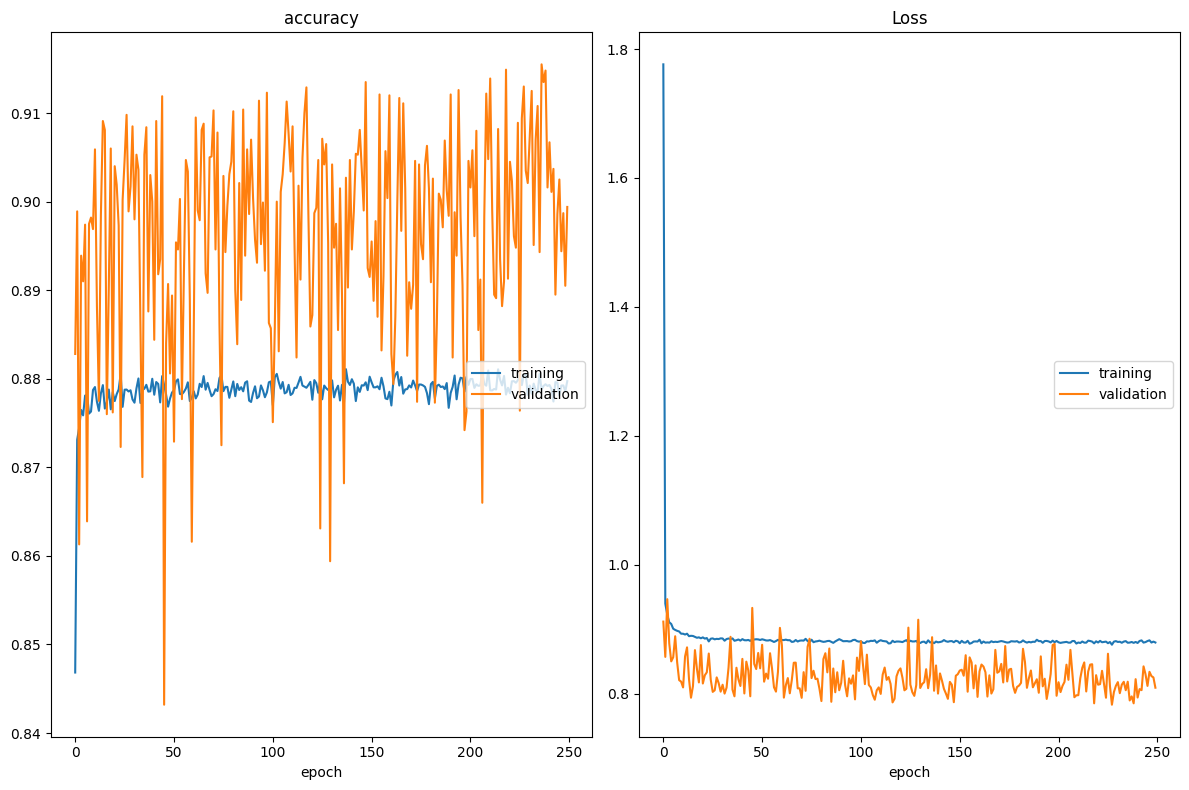

accuracy
	training         	 (min:    0.847, max:    0.881, cur:    0.880)
	validation       	 (min:    0.843, max:    0.915, cur:    0.899)
Loss
	training         	 (min:    0.876, max:    1.776, cur:    0.879)
	validation       	 (min:    0.783, max:    0.946, cur:    0.809)
469/469 [==============================] - 5s 11ms/step - loss: 0.8792 - accuracy: 0.8797 - val_loss: 0.8090 - val_accuracy: 0.8994
Test Loss Score: 0.8090102076530457
Test Accuracy Score: 0.899399995803833


In [12]:
# Building a three-layer feedforward neural network with l2 regularization and dropout

model2 = Sequential()
model2.add(Dense(500, activation = 'relu', input_shape = (28 * 28,), kernel_regularizer = 'l2'))                   # Input_shape = (n_rows,n_cols)
model2.add(Dropout(0.5))
model2.add(Dense(500, activation = 'relu', kernel_regularizer = 'l2'))
model2.add(Dropout(0.25))
model2.add(Dense(10, activation = 'softmax', kernel_regularizer = 'l2'))

# Compiling the model2

model2.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

PlotLosses2 = livelossplot.PlotLossesKeras()

# Training the model2

model2.fit(X_train, y_train, batch_size = 128, epochs = 250, callbacks=[PlotLosses2], verbose = 1, validation_data = (X_test, y_test))

score = model2.evaluate(X_test, y_test, verbose = 0)

# Display both loss and accuracy

print('Test Loss Score:', score[0])
print('Test Accuracy Score:', score[1])

In [9]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 500)               392500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               250500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


• Build a three-layer feedforward network with l2 regularization and without dropout

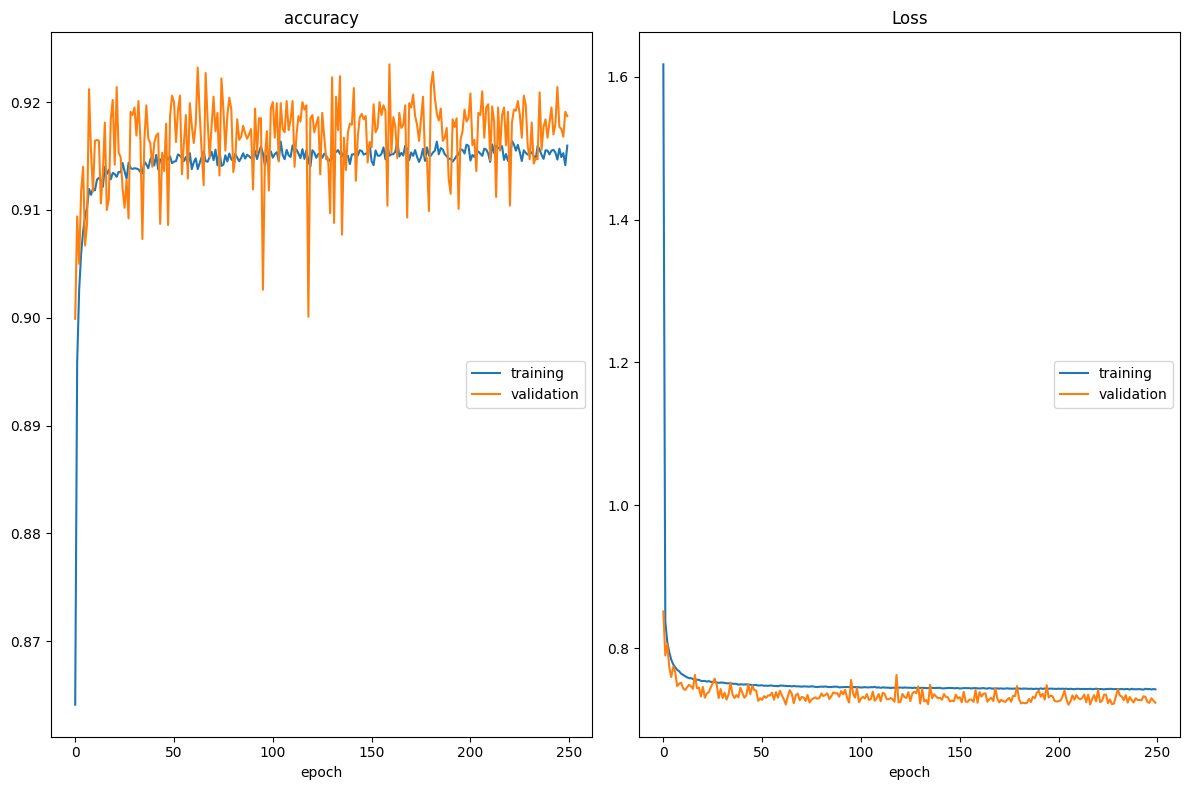

accuracy
	training         	 (min:    0.864, max:    0.916, cur:    0.916)
	validation       	 (min:    0.900, max:    0.924, cur:    0.919)
Loss
	training         	 (min:    0.742, max:    1.617, cur:    0.742)
	validation       	 (min:    0.721, max:    0.851, cur:    0.723)
469/469 [==============================] - 4s 8ms/step - loss: 0.7421 - accuracy: 0.9160 - val_loss: 0.7234 - val_accuracy: 0.9187
Test Loss Score: 0.7233534455299377
Test Accuracy Score: 0.9186999797821045


In [10]:
# Building a three-layer feedforward neural network with l2 regularization and without dropout

model3 = Sequential()
model3.add(Dense(500, activation = 'relu', input_shape = (28 * 28,), kernel_regularizer = 'l2'))                  # Input_shape = (n_rows,n_cols)
model3.add(Dense(500, activation = 'relu', kernel_regularizer = 'l2'))
model3.add(Dense(10, activation = 'softmax', kernel_regularizer = 'l2'))

# Compiling model2

model3.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Live training loss plot

PlotLosses3 = livelossplot.PlotLossesKeras()

# Training the model2

model3.fit(X_train, y_train, batch_size = 128, epochs = 250, callbacks = [PlotLosses3], verbose = 1, validation_data = (X_test, y_test))

score = model3.evaluate(X_test, y_test, verbose = 0)

# Display both loss and accuracy

print('Test Loss Score:', score[0])
print('Test Accuracy Score:', score[1])

In [11]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 500)               392500    
                                                                 
 dense_7 (Dense)             (None, 500)               250500    
                                                                 
 dense_8 (Dense)             (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________
